- Ajustad un modelo de Decision Tree a nuestros datos.

- Calculad las métricas a nuestro nuevo modelo.

- Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_esta = pd.read_csv("./Datos/tiempo_esta_cod.csv", index_col = 0)
df_esta.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,mes,hora
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.646271,0,0,3
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,-2.485747,0,0,0
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,-2.485747,0,0,0
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,-2.485747,0,0,0
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,-2.485747,0,0,0


In [3]:
# separamos los datos en X e y

X1 = df_esta.drop("Weather_Mainly Clear", axis = 1)
y1 = df_esta["Weather_Mainly Clear"]

In [4]:
X1

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,mes,hora
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.646271,0,3
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,-2.485747,0,0
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,-2.485747,0,0
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,-2.485747,0,0
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,-2.485747,0,0
...,...,...,...,...,...,...,...,...
4170,-2.101351,-1.839042,1.000461,1.533659,-0.673565,0.455830,0,2
4171,-2.135006,-1.839042,1.192591,0.732864,-0.673565,0.496780,0,1
4172,-2.126592,-1.820979,1.256635,0.599398,-0.673565,0.551380,0,1
4173,-1.991973,-1.712603,1.064504,1.800591,-0.673565,0.524080,0,0


In [5]:
y1

0       0
1       0
2       0
3       0
4       0
       ..
4170    1
4171    1
4172    1
4173    0
4174    0
Name: Weather_Mainly Clear, Length: 4175, dtype: int64

In [6]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [7]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train1, y_train1)


DecisionTreeClassifier(random_state=0)

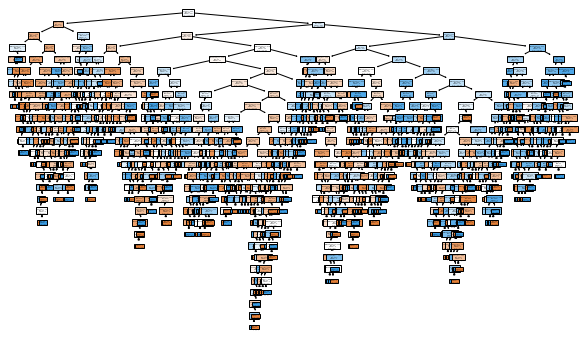

In [8]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
plt.show()

In [9]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 4. 

max_features = np.sqrt(len(x_train1.columns))
max_features

2.8284271247461903

In [10]:
# max depth

print(arbol.tree_.max_depth)

27


In [11]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

In [12]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [13]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree Esta I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.610778,0.592166,0.634568,0.612634,0.222477,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I


Nos da un modelo overfitting porque no hemos modificado los hiperparámetros

Vamos a probar ahora modificando los hiperparámetros

In [14]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [2,4, 6, 8],
         "max_features": [1,2],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 


In [15]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla


In [16]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8], 'max_features': [1, 2],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [17]:
# este método nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 6, que usa 4 variables predictoras para construir el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. 
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=8, max_features=2, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [18]:
# # veamos ahora que pinta tiene nuestro árbol

# fig = plt.figure(figsize=(40, 20))
# tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True);

In [19]:
y_pred_test_esta2 = mejor_modelo.predict(x_test1)
y_pred_train_esta2 = mejor_modelo.predict(x_train1)

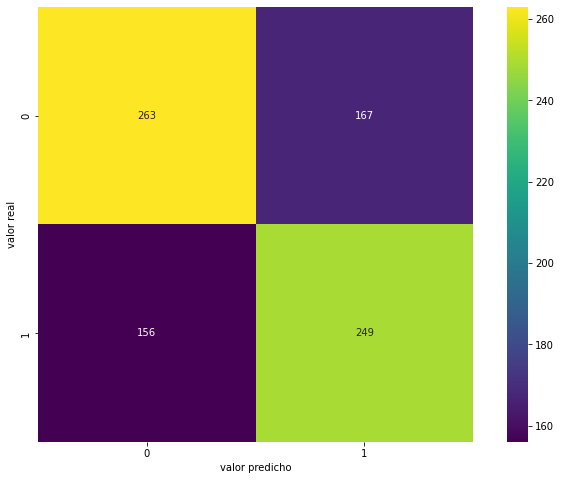

In [20]:
# MATRIZ DE CONFUSIÓN PARA DATOS ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta2)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [21]:
dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.613174,0.598558,0.614815,0.606577,0.226264,test,Decision tree Esta II
1,0.669760,0.675882,0.675485,0.675684,0.339301,train,Decision tree Esta II


- ***Accuracy***: también llamada **exactitud**. Mide  que porcentaje de los valores predichos están bien predichos. Viene definida por la siguiente fórmula: 

$$ accuracy =\dfrac{VP + VN}{VP + FP + FN + VN} $$

- ***Recall***: también llamado **sensibilidad** o **exhaustividad**. Contesta a la siguiente pregunta: **¿Qué porcentaje de casos positivos fueron capturados?**. Viene definida por la siguiente fórmula

$$ recall =\dfrac{VP}{VP + FN} $$


- ***Precision***: contesta a la siguiente pregunta **¿Qué porcentaje de predicciones positivas fueron correctas?**

$$  precision  =\dfrac{VP}{VN + FP} $$



- ***Especificidad*** : es el opuesto a la exhaustividad o recall, es decir, contesta a la pregunta de **¿Qué porcentahe de casos negativos fueron capturados?**. Viene definida por la siguiente fórmula: 


$$ Especificidad\:  =\dfrac{VN}{VN + FP}$$

- ***F1***: es la media de la *precision* y el *recall*, teniendo en cuenta ambas métricas en la siguiente ecuación:

$$ F1 = \dfrac{2 (Precision \cdot Exhaustividad)}{Precision +Exhaustividad}$$


- ***kappa***: es una medida de concordancia que se basa en comparar la concordancia observada en un conjunto de datos, respecto a la que podría ocurrir por mero azar.

    - <0 No acuerdo

    - 0.0-0.2 Insignificante

    - 0.2-0.4 Bajo

    - 0.4-0.6 Moderado

    - 0.6-0.8 Bueno

    - 0.8-1.0 Muy bueno


Accuracy (58/62)

Recall (68/69) nos interesa un recall alto. Tenemos más falsos negativos que falsos positivos. Esto juega a nuestro favor.

Precision (55/62)

F1

kappa. Nos da un kappa bajo tirando a moderado

In [22]:
# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor

df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.610778,0.592166,0.634568,0.612634,0.222477,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
0,0.613174,0.598558,0.614815,0.606577,0.226264,test,Decision tree Esta II
1,0.669760,0.675882,0.675485,0.675684,0.339301,train,Decision tree Esta II


In [23]:
df_decision_results.to_csv("./Datos/resultados_dt.csv")

In [24]:
# si recodáis, en la clase de métricas guardamos en un csv los resultados de las métricas del modelo
# vamos a cargar ese csv para comparar todos los modelos que hemos hecho, y comparar cuál de ellos es el mejor

df_regresion_results = pd.read_csv("./Datos/resultados_rlog.csv", index_col = 0)
df_regresion_results


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.595210,0.573951,0.641975,0.606061,0.192475,test,RLog estandarizadas
1,0.614072,0.611472,0.664315,0.636799,0.226614,train,RLog estandarizadas
0,0.577246,0.557522,0.622222,0.588098,0.156578,test,RLog sin estandarizar
1,0.608383,0.605249,0.664315,0.633408,0.215048,train,RLog sin estandarizar
